In [163]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Part 1

In [164]:
G = 6.67384 * 10 ** (-11)

M1_val = 40 * 10 ** 4
M1_dev = 0.05 * 10 ** 4
M2_val = 30 * 10 ** 4
M2_dev = 0.1 * 10 ** 4
r_val = 3.2
r_dev = 0.01

In [165]:
# Standard error propagation rules
F_val = G * M1_val * M2_val / r_val ** 2
F_dev = np.abs(F_val) * np.sqrt((M1_dev / M1_val) ** 2
                  + (M2_dev / M2_val) ** 2
                  + 2 * (r_dev / r_val) ** 2)
print(F_val, F_dev)

0.7820906249999999 0.004438311659528638


In [166]:
# Monte-Carlo error propagation
N = 1000000
M1 = np.random.normal(M1_val, M1_dev, N)
M2 = np.random.normal(M2_val, M2_dev, N)
r = np.random.normal(r_val, r_dev, N)

F = G * M1 * M2 / r ** 2
print(np.mean(F), np.std(F))

0.7821107093791856 0.005630380551843597


(0.75, 0.81)

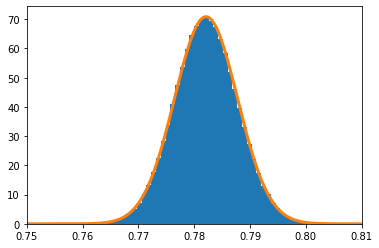

In [167]:
def gaussian(x, m, dev):
    norm = 1 / (dev * np.sqrt(2 * np.pi))
    return norm * np.exp(-(x - m) ** 2 / (2 * dev ** 2))

x = np.linspace(0.75, 0.81, 1000)
y = gaussian(x, np.mean(F), np.std(F))

plt.hist(F, bins=70, range=[0.75, 0.81], density=True)
plt.plot(x, y, lw=3)
plt.xlim(0.75, 0.81)

# Part 2

In [168]:
G = 6.67384 * 10 ** (-11)

M1_val = 40 * 10 ** 4
M1_dev = 2 * 10 ** 4
M2_val = 30 * 10 ** 4
M2_dev = 10 * 10 ** 4
r_val = 3.2
r_dev = 1.0

In [169]:
# Standard error propagation rules
F_val = G * M1_val * M2_val / r_val ** 2
F_dev = F_val * np.sqrt((M1_dev / M1_val) ** 2
                  + (M2_dev / M2_val) ** 2
                  + 2 * (r_dev / r_val) ** 2)
print(F_val, F_dev)

0.7820906249999999 0.43469298471288537


In [170]:
# Monte-Carlo error propagation
N = 1000000
M1 = np.random.normal(M1_val, M1_dev, N)
M2 = np.random.normal(M2_val, M2_dev, N)
r = np.random.normal(r_val, r_dev, N)

F = G * M1 * M2 / r ** 2
print(np.mean(F), np.std(F))

792.0432148719905 694880.6805229277


(-2, 7)

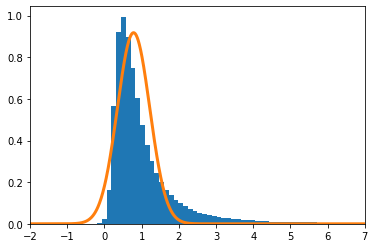

In [171]:
def gaussian(x, m, dev):
    norm = 1 / (dev * np.sqrt(2 * np.pi))
    return norm * np.exp(-(x - m) ** 2 / (2 * dev ** 2))


x = np.linspace(-2, 7, 1000)
y = gaussian(x, F_val, F_dev)
plt.hist(F, bins=70, range=[-2, 7], density=True)
plt.plot(x, y, lw=3)
plt.xlim(-2, 7)